# Business predictions workshop

## Import Python Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

## Reading the Income Classification Dataset

### Load datasets

In [39]:
data_set = pd.read_csv('data_set.csv')
data_set.tail(50)

,manual_match,company_type,page_handle,page_name,company_name,company_id,company_status_date,days_from_company_status_to_now,bigrams_intersection,times_prosecutor,...,number_of_different_months_with_reactions,total_posts_with_reactions,distinct_interacting_users,distinct_interacting_users_1qr_before_status,distinct_interacting_users_2qr_before_status,distinct_interacting_users_3qr_before_status,distinct_interacting_users_4qr_before_status,distinct_interacting_users_6months_before_status,distinct_interacting_users_12months_before_status,distinct_interacting_users_6months_after_status
548,NaN,rasham,1.065453e+15,"של אפי בע""מ 4X4","4X4 של אפי בע""מ",512945569,2016-06-26,0,13,0,...,14.0,32.0,30.0,0.0,0.0,30.0,0.0,0.0,30.0,30.0
549,NaN,rasham,1.082389e+14,נופי אדום,"נופי אדום בע""מ",515408631,2016-06-26,0,0,0,...,34.0,48.0,34.0,7.0,14.0,8.0,2.0,16.0,17.0,25.0
550,1.0,rasham,1.031382e+14,מעבדות פרונט ירושלים,"מעבדות פרונט ירושלים בע""מ",512044561,2016-06-26,0,0,0,...,5.0,5.0,6.0,4.0,0.0,0.0,0.0,4.0,4.0,3.0
551,NaN,forceliquidated,3.021717e+14,משק גרובר דבש מהגולן,"משק - דבש בע""מ",513929745,2014-07-03,724,13,0,...,26.0,28.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
552,NaN,forceliquidated,1.666155e+15,תבליני הכפר,"תבליני הכפר בע""מ",512420019,2006-01-30,3800,0,0,...,4.0,16.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553,NaN,forceliquidated,2.396364e+14,"פולי דקור בע""מ עבודות עץ/נגרות","פולי עץ בע""מ",510421886,1989-03-21,9959,23,0,...,13.0,24.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554,1.0,rasham,1.059279e+14,א.א אור סוכנות לביטוח,"א.א. אור סוכנות לביטוח (2009) בע""מ",514350198,2016-06-26,0,1,0,...,10.0,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
555,NaN,rasham,1.000220e+15,"דיל לתבשיל של בת שבע- אוכל ביתי, עוגיות מרוקאי...","בת שבע - אוכל ביתי בע""מ",514868611,2016-06-26,0,47,0,...,4.0,29.0,7.0,0.0,0.0,0.0,2.0,0.0,2.0,7.0
556,NaN,rasham,1.064723e+14,Tashoot Yacht sales & Charters | תשוט מכירת ...,"תשוט יאכטות בע""מ",514895168,2016-06-26,0,52,0,...,500.0,538.0,615.0,139.0,111.0,123.0,123.0,193.0,299.0,535.0
557,NaN,rasham,1.093878e+15,אן.די.איי תקשורת - NDI Communications,"איי די אן תקשורת בע""מ",511512147,2016-06-26,0,25,0,...,7.0,9.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0


In [40]:
data_set['company_type'][data_set['company_type'].apply(lambda x: x == 'forceliquidated')] = 0
data_set['company_type'][data_set['company_type'].apply(lambda x: x == 'rasham')] = 1
data_set.head(10)

/home/guy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/guy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,manual_match,company_type,page_handle,page_name,company_name,company_id,company_status_date,days_from_company_status_to_now,bigrams_intersection,times_prosecutor,...,number_of_different_months_with_reactions,total_posts_with_reactions,distinct_interacting_users,distinct_interacting_users_1qr_before_status,distinct_interacting_users_2qr_before_status,distinct_interacting_users_3qr_before_status,distinct_interacting_users_4qr_before_status,distinct_interacting_users_6months_before_status,distinct_interacting_users_12months_before_status,distinct_interacting_users_6months_after_status
0,1.0,0,3.936822e+14,פלקון מעדני בשר,"פלקון מעדני בשר בע""מ",511817470,2005-09-08,3944,0,0,...,20.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1,1.029559e+15,שטח גלילי - טיולי Rzr,"כלנית גליל בע""מ",513218933,2016-06-26,0,15,0,...,41.0,50.0,4268.0,1336.0,3309.0,0.0,0.0,4268.0,4268.0,0.0
2,NaN,1,1.033097e+15,נטע אפרתי,"נטע אפרתי בע""מ",515193670,2016-06-26,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1,1.002604e+15,רשת מדיה,"רשת מדיה בע""מ",511677957,2016-06-26,0,0,0,...,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,1,1.034302e+15,"י.ח.מ אלקטרו-מכניקה בע""מ","י. ח. מ. אלקטרו מכניקה בע""מ",511380529,2016-06-26,0,4,0,...,2.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0,1.428417e+14,טלי רוקני (Tali Rokni),"טלי רוקני בע""מ",514708403,2014-10-02,633,13,0,...,914.0,966.0,7728.0,1357.0,204.0,300.0,411.0,1505.0,2056.0,1050.0
6,NaN,1,1.050091e+14,"שלדג מחנאות וספורט בע""מ","שלדג מחנאות וספורט בע""מ",511362279,2016-06-26,0,0,0,...,139.0,150.0,110.0,1.0,0.0,9.0,19.0,1.0,24.0,110.0
7,NaN,0,3.899514e+14,הגן של ברני ברני,"הגן של ברני בע""מ",514734185,2015-12-04,205,5,0,...,93.0,164.0,93.0,0.0,3.0,90.0,15.0,3.0,93.0,92.0
8,NaN,1,1.032038e+15,קבוצת ברבי-טק,"ברביטק בע""מ",513037002,2016-06-26,0,6,0,...,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NaN,1,1.097019e+15,מהדר אור,"אור בונה בע""מ",515178010,2016-06-26,0,6,0,...,1.0,8.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0


In [47]:
tagged_data = data_set.drop(['manual_match', 'page_name', 'page_handle', 'company_name'], 1)
tagged_data = tagged_data.drop(['days_from_company_status_to_now', 'bigrams_intersection', 'times_prosecutor', 'times_defendant', 'companies_general_info_columns'], 1)

In [50]:
tagged_data = tagged_data.rename(columns={'company_type': 'tag'})

In [100]:
tagged_data.columns.values

array(['tag', 'company_id', 'company_status_date',
       'times_unknown_appearences', 'changed_picture', 'has_website',
       'has_top_20_website', 'phone', 'has_phone', 'email', 'has_email',
       'number_of_likes', 'has_more_than_100_likes',
       'has_more_than_10_likes', 'has_more_than_1_likes', 'checkins',
       'were_here_count', 'talking_about_count', 'changed_cover',
       'has_location', 'has_country', 'has_state', 'has_country_state',
       'has_country_state_city', 'has_country_or_state_or_city',
       'is_unclaimed', 'is_published', 'is_verified',
       'is_permanently_closed', 'is_community_page', 'start_info',
       'has_start_info', 'has_text', 'description_length',
       'description_words', 'about_length', 'about_words',
       'products_length', 'products_words', 'general_info_length',
       'general_info_words', 'category', 'category_list',
       'number_of_records', 'number_of_pages', 'companies_events_columns',
       'first_event_time', 'last_event_ti

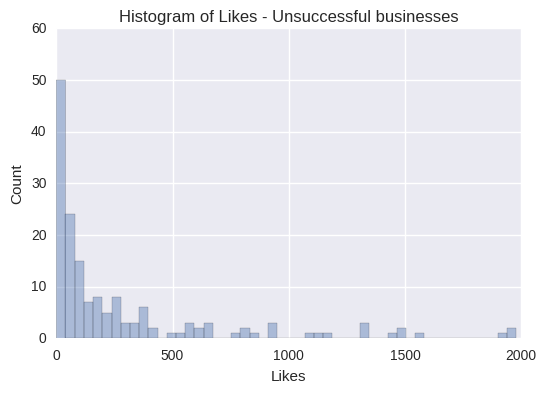

In [189]:
%matplotlib inline
sns.distplot(tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 0)].number_of_likes, bins = 50, kde = False)
axes = plt.gca()
axes.set_ylim([0,60])
plt.title('Histogram of Likes - Unsuccessful businesses')
plt.xlabel('Likes')
plt.ylabel('Count')
#plt.show()



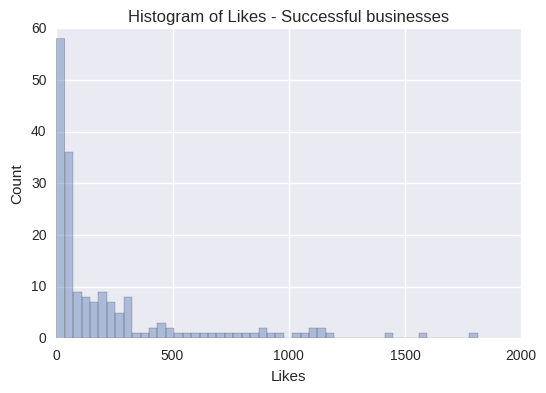

In [190]:
%matplotlib inline
sns.distplot(tagged_data[(tagged_data.number_of_likes < 2000) & (tagged_data.tag == 1)].head(180).number_of_likes, bins = 50, kde = False)
plt.title('Histogram of Likes - Successful businesses')
axes = plt.gca()
axes.set_ylim([0,60])
plt.xlabel('Likes')
plt.ylabel('Count')

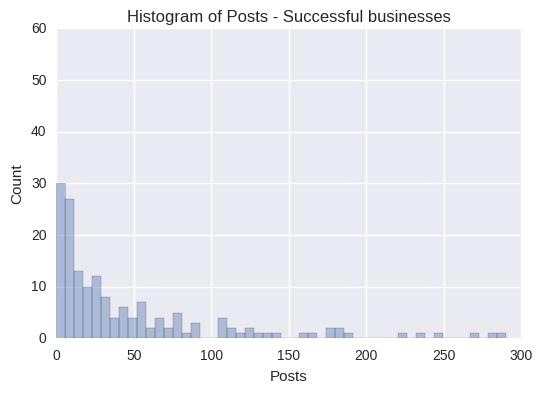

In [187]:
%matplotlib inline
sns.distplot(tagged_data[(tagged_data.total_posts < 300) & 
                         (tagged_data.tag == 0)].total_posts, bins = 50, kde = False)
axes = plt.gca()
axes.set_ylim([0,60])
plt.title('Histogram of Posts - Successful businesses')
plt.xlabel('Posts')
plt.ylabel('Count')

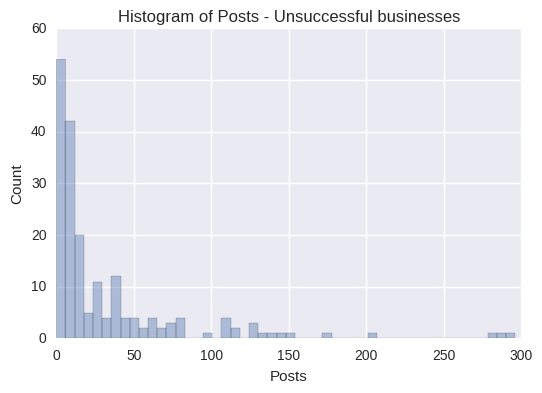

In [188]:
%matplotlib inline
sns.distplot(tagged_data[(tagged_data.total_posts < 300) & 
                         (tagged_data.tag == 1)].head(190).total_posts, bins = 50, kde = False)
axes = plt.gca()
axes.set_ylim([0,60])
plt.title('Histogram of Posts - Unsuccessful businesses')
plt.xlabel('Posts')
plt.ylabel('Count')

In [215]:
tagged_data.description_length.fillna(0, inplace=True)
tagged_data.total_posts.fillna(0, inplace=True)
tagged_data.total_declined.fillna(0, inplace=True)
tagged_data.about_words.fillna(0, inplace=True)
tagged_data.total_photos.fillna(0, inplace=True)
tagged_data.total_posts_with_reactions.fillna(0, inplace=True)
tagged_data.number_of_likes.fillna(0, inplace=True)
tagged_data.total_other_users_posts.fillna(0, inplace=True)
tagged_data.number_of_albums.fillna(0, inplace=True)
tagged_data.total_interested.fillna(0, inplace=True)


# data_set['has_phone'][data_set['has_phone'].apply(lambda x: x == 'False')] = 0
# data_set['has_phone'][data_set['has_phone'].apply(lambda x: x == 'True')] = 1


In [217]:
tagged_data[['company_id', 'tag','has_website', 'has_email',  
             'has_location', 'has_country', #'has_state', 
             'number_of_likes', 'checkins', 'were_here_count', 'talking_about_count',
             'description_words', 'about_words', 'general_info_words', 'category',
             'total_events', 'total_attending', 'total_interested', 
             'total_photos','number_of_albums',
             'total_posts', 'total_posts_with_photos', 'total_posts_with_link',
             'total_posts_with_comments', 'total_posts_with_reactions',
             'total_other_users_posts','total_likes_to_other_users_posts']].head(20)

,company_id,tag,has_website,has_email,has_location,has_country,number_of_likes,checkins,were_here_count,talking_about_count,...,total_interested,total_photos,number_of_albums,total_posts,total_posts_with_photos,total_posts_with_link,total_posts_with_comments,total_posts_with_reactions,total_other_users_posts,total_likes_to_other_users_posts
0,511817470,0,1,0,1,1,67,1,1,23,...,0.0,26.0,4.0,21,3,18,0.0,21.0,17,4
1,513218933,1,0,0,1,1,4155,86,86,639,...,0.0,251.0,7.0,50,50,50,28.0,50.0,50,0
2,515193670,1,0,0,0,0,51,0,0,3,...,0.0,0.0,0.0,1,0,0,0.0,1.0,0,0
3,511677957,1,0,0,0,0,302,0,0,3,...,0.0,3.0,2.0,9,9,9,0.0,9.0,9,0
4,511380529,1,1,0,1,1,5,0,0,0,...,0.0,4.0,3.0,4,4,4,0.0,4.0,4,0
5,514708403,0,1,0,0,0,11733,0,0,188,...,0.0,776.0,11.0,966,907,919,320.0,966.0,966,0
6,511362279,1,1,0,1,1,267,0,0,30,...,0.0,128.0,6.0,150,134,141,34.0,150.0,144,7
7,514734185,0,0,0,0,0,1485,0,0,0,...,0.0,3752.0,2.0,164,162,162,9.0,164.0,155,11
8,513037002,1,1,0,1,1,1,0,0,0,...,0.0,47.0,3.0,6,6,6,0.0,6.0,6,0
9,515178010,1,0,0,1,1,4,0,0,0,...,0.0,3.0,2.0,8,8,8,0.0,8.0,8,0
